C:\Users\admin\AppData\Local\Temp\ipykernel_20208\50768518.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rating'].fillna(df['Rating'].median(), inplace=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_20208\50768518.py:67: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

Logistic Regression Model Performance
Accuracy: 95.25%
Confusion Matrix:


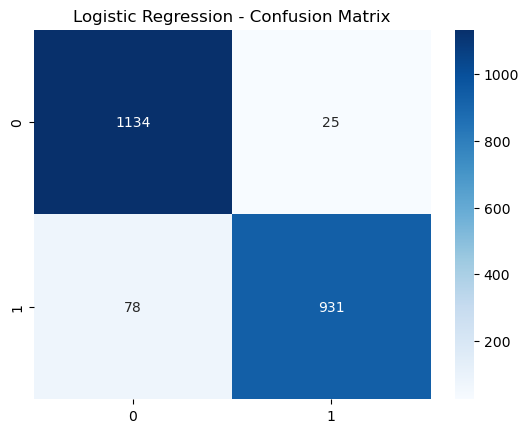

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1159
           1       0.97      0.92      0.95      1009

    accuracy                           0.95      2168
   macro avg       0.95      0.95      0.95      2168
weighted avg       0.95      0.95      0.95      2168

Decision Tree Model Performance
Accuracy: 94.28%
Confusion Matrix:


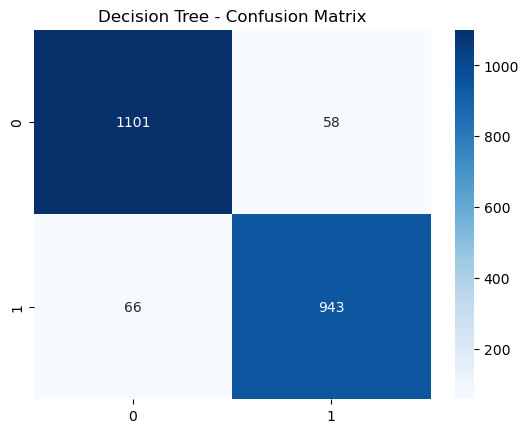

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1159
           1       0.94      0.93      0.94      1009

    accuracy                           0.94      2168
   macro avg       0.94      0.94      0.94      2168
weighted avg       0.94      0.94      0.94      2168

Random Forest Model Performance
Accuracy: 95.53%
Confusion Matrix:


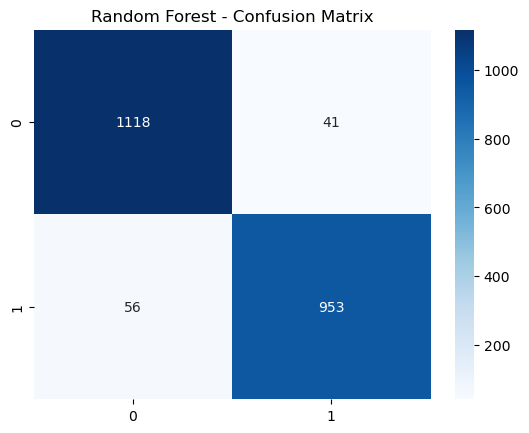

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1159
           1       0.96      0.94      0.95      1009

    accuracy                           0.96      2168
   macro avg       0.96      0.95      0.95      2168
weighted avg       0.96      0.96      0.96      2168

Artificial Neural Network Model Performance
Accuracy: 90.45%
Confusion Matrix:


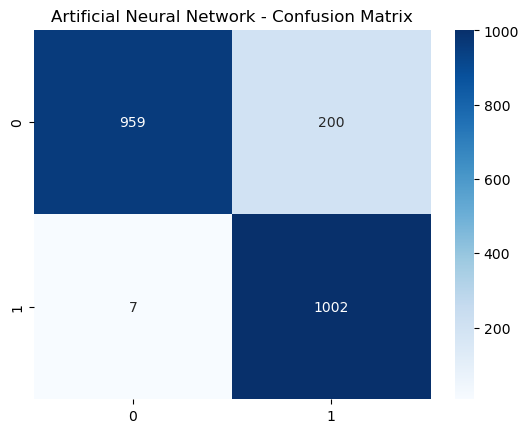

              precision    recall  f1-score   support

           0       0.99      0.83      0.90      1159
           1       0.83      0.99      0.91      1009

    accuracy                           0.90      2168
   macro avg       0.91      0.91      0.90      2168
weighted avg       0.92      0.90      0.90      2168



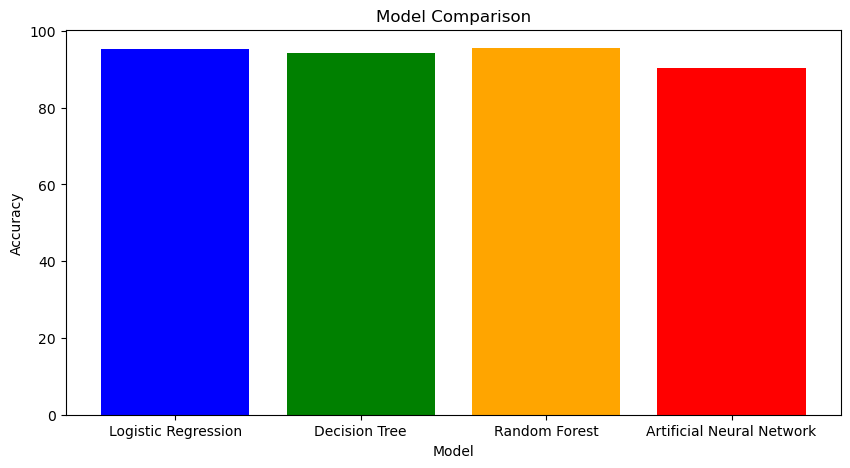

The best model is Random Forest with an accuracy of 95.53
The new data is predicted to be: Popular with 100.00% confidence
Enter app details to predict success:


Rating (1.0-5.0):  5
Number of reviews:  25000
Size (in MB):  10
Price (in $):  50



Available Categories: AUTO_AND_VEHICLES, BEAUTY, BOOKS_AND_REFERENCE, BUSINESS, COMICS, COMMUNICATION, DATING, EDUCATION, ENTERTAINMENT, EVENTS, FAMILY, FINANCE, FOOD_AND_DRINK, GAME, HEALTH_AND_FITNESS, HOUSE_AND_HOME, LIBRARIES_AND_DEMO, LIFESTYLE, MAPS_AND_NAVIGATION, MEDICAL, NEWS_AND_MAGAZINES, PARENTING, PERSONALIZATION, PHOTOGRAPHY, PRODUCTIVITY, SHOPPING, SOCIAL, SPORTS, TOOLS, TRAVEL_AND_LOCAL, VIDEO_PLAYERS, WEATHER


Enter app category from the list above:  sports



Available Types: Paid


Enter app type from the list above:  free



Available Content Ratings: Everyone, Everyone 10+, Mature 17+, Teen, Unrated


Enter content rating from the list above:  teen



Available Genres: Action;Action & Adventure, Adventure, Adventure;Action & Adventure, Adventure;Brain Games, Adventure;Education, Arcade, Arcade;Action & Adventure, Arcade;Pretend Play, Art & Design, Art & Design;Action & Adventure, Art & Design;Creativity, Art & Design;Pretend Play, Auto & Vehicles, Beauty, Board, Board;Action & Adventure, Board;Brain Games, Board;Pretend Play, Books & Reference, Books & Reference;Creativity, Books & Reference;Education, Business, Card, Card;Action & Adventure, Card;Brain Games, Casino, Casual, Casual;Action & Adventure, Casual;Brain Games, Casual;Creativity, Casual;Education, Casual;Music & Video, Casual;Pretend Play, Comics, Comics;Creativity, Communication, Communication;Creativity, Dating, Education, Education;Action & Adventure, Education;Brain Games, Education;Creativity, Education;Education, Education;Music & Video, Education;Pretend Play, Educational, Educational;Action & Adventure, Educational;Brain Games, Educational;Creativity, Educational

Enter genre from the list above:  word



Prediction Results:
The app is predicted to be: Unpopular
Confidence: 48.00%
Estimated installs: 48,000


C:\Users\admin\AppData\Local\Temp\ipykernel_20208\50768518.py:203: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[col] = 0
C:\Users\admin\AppData\Local\Temp\ipykernel_20208\50768518.py:203: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[col] = 0
C:\Users\admin\AppData\Local\Temp\ipykernel_20208\50768518.py:203: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=

['feature_columns.pkl']

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt




# Load the dataset
df = pd.read_csv('googleplaystore.csv')
df.head()




# Drop irrelevant columns
df.drop(['App', 'Last Updated', 'Current Ver', 'Android Ver'], axis=1, inplace=True)




# Handle missing values
df['Rating'].fillna(df['Rating'].median(), inplace=True)
df.dropna(inplace=True)



# Convert Reviews to numeric
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')



# Clean and convert Installs
df['Installs'] = df['Installs'].str.replace('[+,]', '', regex=True).astype(int)



# Create binary target variable Success
df['Success'] = np.where(df['Installs'] > 100000, 1, 0)





# Convert Price to numeric
df['Price'] = df['Price'].str.replace('$', '').astype(float)




# Handle Size conversion
def size_to_kb(size):
    if size.endswith('M'):
        return float(size[:-1]) * 1024
    elif size.endswith('k'):
        return float(size[:-1])
    else:
        return np.nan
df['Size'] = df['Size'].apply(lambda x: size_to_kb(x) if x not in ['Varies with device'] else np.nan)
df['Size'].fillna(df['Size'].median(), inplace=True)




# Encode categorical variables
df = pd.get_dummies(df, columns=['Category', 'Type', 'Content Rating', 'Genres'], drop_first=True)





# Split the data
X = df.drop(['Success', 'Installs'], axis=1)
y = df['Success']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




# Model training, testing and evaluation function
accuracies = {}

def evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[model_name] = accuracy * 100
    cm = confusion_matrix(y_test, y_pred)

    print(f'{model_name} Model Performance')
    print(f'Accuracy: {accuracy * 100:.2f}%')
    print('Confusion Matrix:')
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.show()
    print(classification_report(y_test, y_pred))



# Logistic Regression
logistic_model = LogisticRegression(max_iter=200, random_state=42)
evaluate_model(logistic_model, 'Logistic Regression')



# Decision Tree
decision_tree_model = DecisionTreeClassifier(random_state=42)
evaluate_model(decision_tree_model, 'Decision Tree')



# Random Forest
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
evaluate_model(random_forest_model, 'Random Forest')



# Artificial Neural Network
ann_model = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=300, random_state=42)
evaluate_model(ann_model, 'Artificial Neural Network')



# Display all model accuracies
plt.figure(figsize=(10, 5))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.show()



best_model_name = max(accuracies, key=accuracies.get)
best_model_accuracy = accuracies[best_model_name]
print(f'The best model is {best_model_name} with an accuracy of {best_model_accuracy:.2f}')



# Make predictions with new data
def predict_new_value(model, new_data):
    prediction = model.predict(new_data)
    probability = model.predict_proba(new_data)[0][1] * 100
    result = 'Popular' if prediction[0] == 1 else 'Unpopular'
    return result, probability

new_data = X_test.iloc[[0]]
result, probability = predict_new_value(random_forest_model, new_data)
print(f'The new data is predicted to be: {result} with {probability:.2f}% confidence')



# Function to get user input for a new app prediction
def predict_app_success():
    # Store all categorical values for reference
    categories = df.filter(regex='^Category_').columns.str.replace('Category_', '')
    types = df.filter(regex='^Type_').columns.str.replace('Type_', '')
    content_ratings = df.filter(regex='^Content Rating_').columns.str.replace('Content Rating_', '')
    genres = df.filter(regex='^Genres_').columns.str.replace('Genres_', '')
    
    # Get user input for basic numeric features
    print("Enter app details to predict success:")
    rating = float(input("Rating (1.0-5.0): "))
    reviews = int(input("Number of reviews: "))
    size_mb = float(input("Size (in MB): "))
    price = float(input("Price (in $): "))
    
    # Display and get categorical features
    print("\nAvailable Categories:", ", ".join(categories))
    category = input("Enter app category from the list above: ")
    
    print("\nAvailable Types:", ", ".join(types))
    app_type = input("Enter app type from the list above: ")
    
    print("\nAvailable Content Ratings:", ", ".join(content_ratings))
    content_rating = input("Enter content rating from the list above: ")
    
    print("\nAvailable Genres:", ", ".join(genres))
    genre = input("Enter genre from the list above: ")
    
    # Create a dictionary with the same structure as our training data
    input_data = {
        'Rating': rating,
        'Reviews': reviews,
        'Size': size_mb * 1024,  # Convert to KB
        'Price': price
    }
    
    # Create a DataFrame with zeros for all dummy variables
    input_df = pd.DataFrame([input_data])
    
    # Set all dummy columns to 0 initially
    for col in X.columns:
        if col not in input_df.columns:
            input_df[col] = 0
    
    # Set the selected categorical values to 1
    if f'Category_{category}' in X.columns:
        input_df[f'Category_{category}'] = 1
    if f'Type_{app_type}' in X.columns:
        input_df[f'Type_{app_type}'] = 1
    if f'Content Rating_{content_rating}' in X.columns:
        input_df[f'Content Rating_{content_rating}'] = 1
    if f'Genres_{genre}' in X.columns:
        input_df[f'Genres_{genre}'] = 1
    
    # Make sure to only include columns that were in the training data
    input_df = input_df[X.columns]
    
    # Make prediction using the best model
    best_model = {
        'Logistic Regression': logistic_model,
        'Decision Tree': decision_tree_model,
        'Random Forest': random_forest_model,
        'Artificial Neural Network': ann_model
    }[best_model_name]
    
    result, probability = predict_new_value(best_model, input_df)
    
    print(f"\nPrediction Results:")
    print(f"The app is predicted to be: {result}")
    print(f"Confidence: {probability:.2f}%")
    
    # Estimate install count (rough approximation)
    if result == 'Popular':
        estimated_installs = 100000 * (1 + (probability - 50) / 100)
        print(f"Estimated installs: {int(estimated_installs):,}")
    else:
        estimated_installs = 100000 * (probability / 100)
        print(f"Estimated installs: {int(estimated_installs):,}")
    
    return result, probability, estimated_installs

# Call the function to get prediction for user input
predict_app_success()




import joblib

# Save the best model
joblib.dump(random_forest_model, 'random_forest_model.pkl')

# Save column names for preprocessing in frontend/backend
joblib.dump(X.columns.tolist(), 'feature_columns.pkl')
